In [50]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import datetime

from src.poly_reg import model_county
from src.poly_reg import model_state
from src.data_import import extract_nyt
import src.data_import as di

plt.style.use('ggplot')
font = {'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [61]:
#Base data sets
nyt_df = di.extract_nyt()
airports_df = di.extract_airports()
counties_df = di.extract_geography()

In [62]:
#Build international arrivals influence df
intl_arrivals_df = di.build_intl_arrivals_index_df(counties_df, airports_df, 100)

In [63]:
#First, get max cases, deaths
grouped = nyt_df.groupby('sc')
cases = grouped['cases'].agg([np.max])
cases.columns = ['cases']
deaths = grouped['deaths'].agg([np.max])
deaths.columns = ['deaths']


In [64]:
big_df = pd.merge(intl_arrivals_df, counties_df, how='inner', left_on=['sc'], right_on=['sc'])
big_df = pd.merge(deaths,big_df, how='inner', left_on=['sc'], right_on=['sc'])
big_df = pd.merge(cases,big_df, how='inner', left_on=['sc'], right_on=['sc'])

big_df['death_rate'] = big_df['deaths'] / big_df['Pop'] * 100000
big_df['case_rate'] = big_df['cases'] / big_df['Pop'] * 100000
big_df['intl_normed'] = big_df['international'] / big_df['Pop']
clean_df = big_df[[
    'sc',
    'cases',
    'deaths',
    'case_rate',
    'death_rate',
    'international',
    #'intl_normed',
    'domestic',
    'airports',
    'Pop'  
]]
clean_df

sc  cases  deaths    case_rate  death_rate  \
0                    Alabama:Autauga     17       1    31.152077    1.832475   
1                    Alabama:Baldwin     59       1    32.370450    0.548652   
2                    Alabama:Barbour      7       0    25.494409    0.000000   
3                       Alabama:Bibb     11       0    48.003491    0.000000   
4                     Alabama:Blount     11       0    19.189840    0.000000   
5                    Alabama:Bullock      4       0    36.650174    0.000000   
6                     Alabama:Butler      3       0    14.321860    0.000000   
7                    Alabama:Calhoun     54       0    45.541949    0.000000   
8                   Alabama:Chambers    161       8   470.553851   23.381558   
9                   Alabama:Cherokee      7       0    26.934472    0.000000   
10                   Alabama:Chilton     25       0    57.282955    0.000000   
11                   Alabama:Choctaw      6       0    43.293167    0.000000   
12                    Alabama:Clarke     13       0    50.323230    0.000000   
13                      Alabama:Clay     11       0    78.954924    0.000000   
14                  Alabama:Cleburne     12       0    80.149613    0.000000   
15                    Alabama:Coffee     14       0    28.029150    0.000000   
16                   Alabama:Colbert      8       1    14.698317    1.837290   
17                   Alabama:Conecuh      4       0    30.238887    0.000000   
18                     Alabama:Coosa     10       0    86.662622    0.000000   
19                 Alabama:Covington     10       0    26.479545    0.000000   
20                  Alabama:Crenshaw      2       0    14.382281    0.000000   
21                   Alabama:Cullman     29       1    36.066960    1.243688   
22                      Alabama:Dale      6       0    11.940061    0.000000   
23                    Alabama:Dallas     10       0    22.820630    0.000000   
24                    Alabama:DeKalb     16       0    22.500668    0.000000   
25                    Alabama:Elmore     29       0    36.568604    0.000000   
26                  Alabama:Escambia      5       0    13.048357    0.000000   
27                    Alabama:Etowah     53       5    50.751700    4.787896   
28                   Alabama:Fayette      1       0     5.800128    0.000000   
29                  Alabama:Franklin      8       0    25.233409    0.000000   
30                    Alabama:Geneva      1       0     3.732736    0.000000   
31                    Alabama:Greene     13       0   143.725815    0.000000   
32                      Alabama:Hale      7       0    44.416244    0.000000   
33                     Alabama:Henry      8       0    46.237429    0.000000   
34                   Alabama:Houston     33       1    32.497267    0.984766   
35                   Alabama:Jackson     22       2    41.332406    3.757491   
36                 Alabama:Jefferson    523      14    79.427032    2.126154   
37                     Alabama:Lamar      7       0    48.063719    0.000000   
38                Alabama:Lauderdale     20       3    21.572879    3.235932   
39                  Alabama:Lawrence      8       0    23.297126    0.000000   
40                       Alabama:Lee    206       6   146.883712    4.278166   
41                 Alabama:Limestone     35       0    42.279723    0.000000   
42                   Alabama:Lowndes     12       0   106.204089    0.000000   
43                     Alabama:Macon      9       1    41.954130    4.661570   
44                   Alabama:Madison    177       3    52.865647    0.896028   
45                   Alabama:Marengo     14       1    66.581062    4.755790   
46                    Alabama:Marion     33       3   107.226410    9.747855   
47                  Alabama:Marshall     64       2    68.803148    2.150098   
48                    Alabama:Mobile    329      10    79.662560    2.421354   
49                    Alabama:Monr

In [65]:
clean_df.corr()

cases    deaths  case_rate  death_rate  international  \
cases          1.000000  0.936056   0.598803    0.376953       0.566882   
deaths         0.936056  1.000000   0.553555    0.426829       0.511786   
case_rate      0.598803  0.553555   1.000000    0.732282       0.451453   
death_rate     0.376953  0.426829   0.732282    1.000000       0.263451   
international  0.566882  0.511786   0.451453    0.263451       1.000000   
domestic       0.330378  0.306138   0.251207    0.141982       0.765595   
Pop            0.531871  0.478691   0.157015    0.092213       0.335723   

               domestic       Pop  
cases          0.330378  0.531871  
deaths         0.306138  0.478691  
case_rate      0.251207  0.157015  
death_rate     0.141982  0.092213  
international  0.765595  0.335723  
domestic       1.000000  0.339408  
Pop            0.339408  1.000000

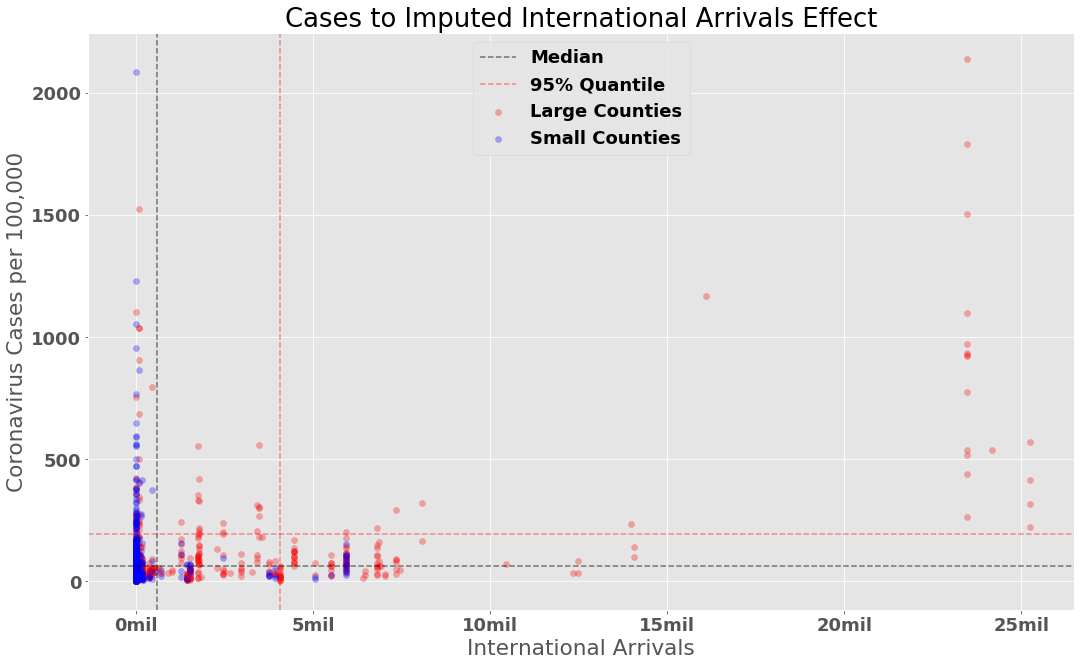

In [66]:
#International feature v case_rate
fig, ax = plt.subplots(figsize=(15,9))
fig.tight_layout()
pop_threshold = clean_df['Pop'].quantile(0.5)
a1 = clean_df[clean_df['Pop']>pop_threshold]
a2 = clean_df[clean_df['Pop']<pop_threshold]

plt.scatter(a1['international'], a1['case_rate'] , color = 'red', alpha=0.3, label='Large Counties') 
plt.scatter(a2['international'], a2['case_rate'] , color = 'blue', alpha=0.3, label='Small Counties') 
plt.axhline(y=clean_df['case_rate'].mean(), color='black', linestyle='--', alpha=0.5, label='Median')
plt.axvline(x=clean_df['international'].mean(), color='black', linestyle='--', alpha=0.5)
plt.axhline(y=clean_df['case_rate'].quantile(.95), color='r', linestyle='--', alpha=0.4, label='95% Quantile')
plt.axvline(x=clean_df['international'].quantile(.95), color='r', linestyle='--', alpha=0.4)
ax.set_title("Cases to Imputed International Arrivals Effect")
ax.set_xlabel("International Arrivals")
ax.set_ylabel("Coronavirus Cases per 100,000")
xlabels = ['{:,.0f}'.format(x/1e6) + 'mil' for x in ax.get_xticks()]
ax.set_xticklabels(xlabels)
ax.legend()

In [32]:
clean_df.sort_values(by='international', ascending=False)

sc  cases  deaths    case_rate  death_rate  \
1391             New Jersey:Somerset    902      31   278.873623    9.584348   
1383            New Jersey:Hunterdon    211       2   164.395515    1.558251   
1384               New Jersey:Mercer    740      19   201.902797    5.183991   
1385            New Jersey:Middlesex   3263      87   402.910140   10.742624   
1388                New Jersey:Ocean   2374      71   411.747464   12.314267   
1375               New Jersey:Bergen   6862     200   758.134869   22.096615   
1453                 New York:Putnam    345      12   346.003410   12.034901   
1449                 New York:Orange   3397      51   911.180672   13.679780   
1444                 New York:Nassau  15616     535  1165.780287   39.939322   
1471            New York:Westchester  14293     253  1505.932381   26.656468   
1393                New Jersey:Union   3685      78   686.860553   14.538704   
1392               New Jersey:Sussex    292      11   195.625230    7.369444   
1389              New Jersey:Passaic   3756      53   749.362563   10.574072   
1387               New Jersey:Morris   1956      60   397.338079   12.188285   
1386             New Jersey:Monmouth   2545      62   403.724737    9.835337   
1382               New Jersey:Hudson   4395      92   692.926942   14.504955   
1380                New Jersey:Essex   4493     186   573.109396   23.725428   
1455               New York:Rockland   5703      76  1829.720200   24.383436   
1463                New York:Suffolk  14473     237   969.163291   15.870359   
306               Florida:Palm Beach   1080      51    81.809877    3.863244   
265                  Florida:Broward   2075      47   118.702612    2.688686   
299               Florida:Miami-Dade   4670      41   187.066757    1.642342   
176                California:Orange    882      14    29.300067    0.465080   
167           California:Los Angeles   6360     147    64.774986    1.497158   
200               California:Ventura    226       6    27.449904    0.728759   
300                   Florida:Monroe     46       2    62.936106    2.736352   
1769              Pennsylvania:Bucks    713      20   114.034569    3.198726   
1806        Pennsylvania:Northampton    716      12   240.482308    4.030430   
156          California:Contra Costa    417       7    39.751198    0.667286   
1394               New Jersey:Warren    215       7   197.806646    6.440216   
190            California:Santa Cruz     71       1    27.059783    0.381124   
187             California:San Mateo    579      13    80.590047    1.809448   
150               California:Alameda    609      13    40.323889    0.860773   
189           California:Santa Clara   1224      40    68.700671    2.245120   
184         California:San Francisco    586       9    72.773787    1.117686   
193                California:Solano     93       1    22.499419    0.241929   
174                  California:Napa     22       2    16.119106    1.465373   
169                 California:Marin    143       9    56.654081    3.565641   
556                 Illinois:McHenry    144       3    46.638166    0.971628   
545                    Illinois:Lake    815      15   115.855583    2.132311   
2360               Wisconsin:Kenosha    104       1    62.490236    0.600868   
541                    Illinois:Kane    234      15    45.413173    2.911101   
542                Illinois:Kankakee     90       6    79.330801    5.288720   
644                   Indiana:Porter     79       0    48.070195    0.000000   
1008                Michigan:Berrien     60       2    38.262134    1.275404   
628                     Indiana:Lake    369       8    74.394411    1.612887   
527                  Illinois:DuPage    715      22    77.978109    2.399326   
533                  Illinois:Grundy      9       0    17.977349    0.000000   
521                    Illinois:Cook   8728     209   168.018211    4.023351   
525                  Illinois:DeKa

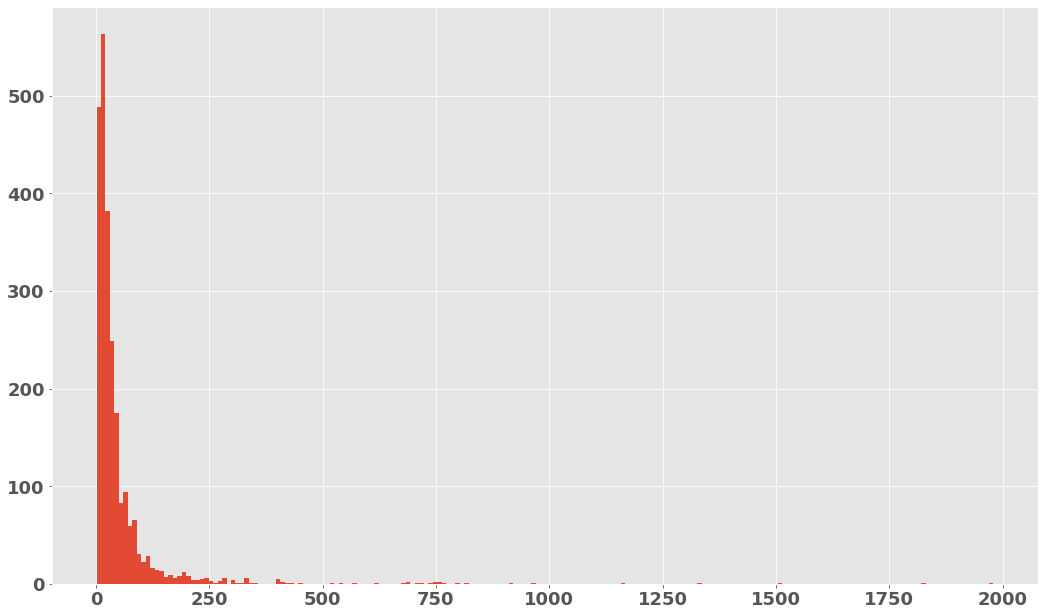

In [98]:
#Is distro of case rates normal?
fig, ax = plt.subplots(figsize=(15,9))
fig.tight_layout()
clean_df
xxx = plt.hist(clean_df['case_rate'], bins=200)


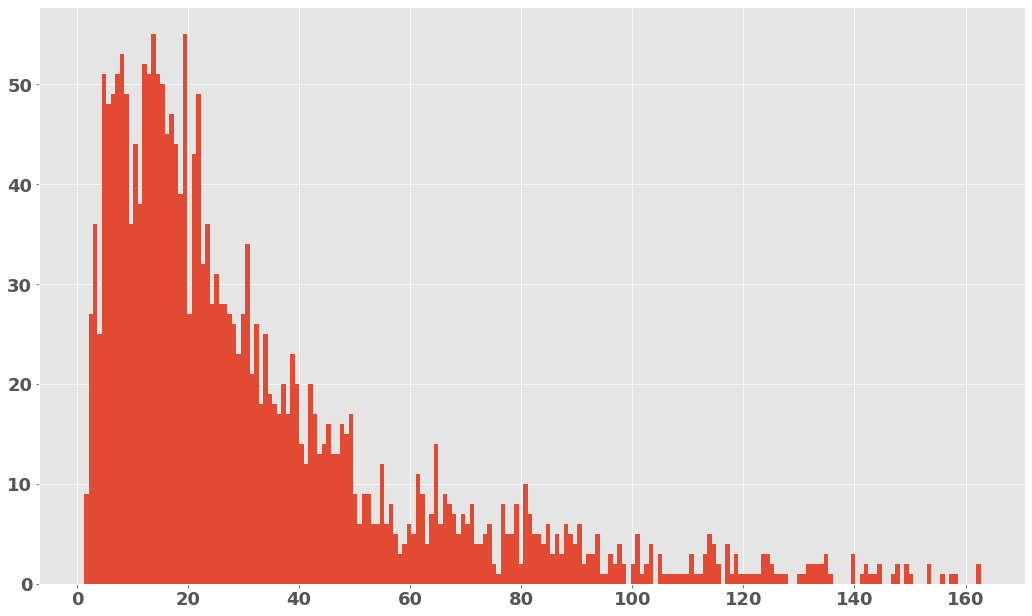

In [99]:
#What if we chop off the outliers
fig, ax = plt.subplots(figsize=(15,9))
fig.tight_layout()
x1 = clean_df[clean_df['case_rate']< clean_df['case_rate'].quantile(.95)]
xxx = plt.hist(x1['case_rate'], bins=200)
#Still bunched up against zero

In [67]:
#Build international arrivals influence df try2
intl_arrivals_df2 = di.build_intl_arrivals_index_df2(counties_df, airports_df, 30, 200)

In [68]:
big_df2 = pd.merge(intl_arrivals_df2, counties_df, how='inner', left_on=['sc'], right_on=['sc'])
big_df2 = pd.merge(deaths,big_df2, how='inner', left_on=['sc'], right_on=['sc'])
big_df2 = pd.merge(cases,big_df2, how='inner', left_on=['sc'], right_on=['sc'])

big_df2['death_rate'] = big_df2['deaths'] / big_df2['Pop'] * 100000
big_df2['case_rate'] = big_df2['cases'] / big_df2['Pop'] * 100000
big_df2['intl_normed'] = big_df2['international'] / big_df2['Pop']
clean_df2 = big_df2[[
    'sc',
    'cases',
    'deaths',
    'case_rate',
    'death_rate',
    'international',
    'intl_normed',
    'domestic',
    'airports',
    'Pop'  
]]
#clean_df2.sort_values(by='case_rate', ascending=False)

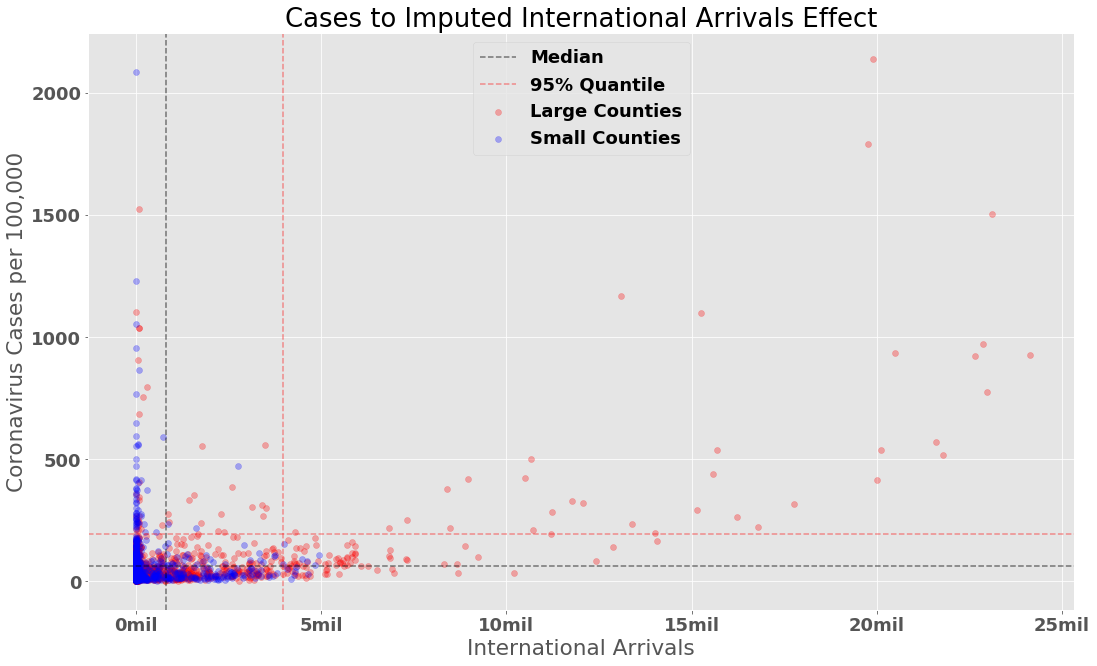

In [69]:
#International v case_rate
fig, ax = plt.subplots(figsize=(15,9))
fig.tight_layout()
pop_threshold = clean_df2['Pop'].quantile(0.5)
a1 = clean_df2[clean_df2['Pop']>pop_threshold]
a2 = clean_df2[clean_df2['Pop']<pop_threshold]

plt.scatter(a1['international'], a1['case_rate'] , color = 'red', alpha=0.3, label='Large Counties') 
plt.scatter(a2['international'], a2['case_rate'] , color = 'blue', alpha=0.3, label='Small Counties') 
plt.axhline(y=clean_df2['case_rate'].mean(), color='black', linestyle='--', alpha=0.5, label='Median')
plt.axvline(x=clean_df2['international'].mean(), color='black', linestyle='--', alpha=0.5)
plt.axhline(y=clean_df2['case_rate'].quantile(.95), color='r', linestyle='--', alpha=0.4, label='95% Quantile')
plt.axvline(x=clean_df2['international'].quantile(.95), color='r', linestyle='--', alpha=0.4)
ax.set_title("Cases to Imputed International Arrivals Effect")
ax.set_xlabel("International Arrivals")
ax.set_ylabel("Coronavirus Cases per 100,000")
xlabels = ['{:,.0f}'.format(x/1e6) + 'mil' for x in ax.get_xticks()]
ax.set_xticklabels(xlabels)
ax.legend()

In [12]:
clean_df2.sort_values(by='international', ascending=False)

sc  cases  deaths    case_rate  death_rate  \
1382               New Jersey:Hudson   4395      92   692.926942   14.504955   
1444                 New York:Nassau  15616     535  1165.780287   39.939322   
1380                New Jersey:Essex   4493     186   573.109396   23.725428   
1393                New Jersey:Union   3685      78   686.860553   14.538704   
1375               New Jersey:Bergen   6862     200   758.134869   22.096615   
1386             New Jersey:Monmouth   2545      62   403.724737    9.835337   
1385            New Jersey:Middlesex   3263      87   402.910140   10.742624   
1389              New Jersey:Passaic   3756      53   749.362563   10.574072   
1387               New Jersey:Morris   1956      60   397.338079   12.188285   
1391             New Jersey:Somerset    902      31   278.873623    9.584348   
1455               New York:Rockland   5703      76  1829.720200   24.383436   
1471            New York:Westchester  14293     253  1505.932381   26.656468   
1384               New Jersey:Mercer    740      19   201.902797    5.183991   
1383            New Jersey:Hunterdon    211       2   164.395515    1.558251   
1392               New Jersey:Sussex    292      11   195.625230    7.369444   
1388                New Jersey:Ocean   2374      71   411.747464   12.314267   
1453                 New York:Putnam    345      12   346.003410   12.034901   
1449                 New York:Orange   3397      51   911.180672   13.679780   
1394               New Jersey:Warren    215       7   197.806646    6.440216   
1769              Pennsylvania:Bucks    713      20   114.034569    3.198726   
1376           New Jersey:Burlington    646      11   143.960565    2.451341   
299               Florida:Miami-Dade   4670      41   187.066757    1.642342   
1463                New York:Suffolk  14473     237   969.163291   15.870359   
265                  Florida:Broward   2075      47   118.702612    2.688686   
167           California:Los Angeles   6360     147    64.774986    1.497158   
1806        Pennsylvania:Northampton    716      12   240.482308    4.030430   
1809       Pennsylvania:Philadelphia   3611      28   236.630787    1.834855   
1810               Pennsylvania:Pike    125       2   217.887709    3.486203   
1377               New Jersey:Camden    645      10   125.570176    1.946824   
1804         Pennsylvania:Montgomery   1230      22   153.774219    2.750433   
1429               New York:Dutchess   1189      12   399.679987    4.033776   
1803             Pennsylvania:Monroe    572      11   336.783599    6.476608   
176                California:Orange    882      14    29.300067    0.465080   
306               Florida:Palm Beach   1080      51    81.809877    3.863244   
1797             Pennsylvania:Lehigh   1006       8   287.842242    2.289004   
1381           New Jersey:Gloucester    279       3    96.778222    1.040626   
200               California:Ventura    226       6    27.449904    0.728759   
1374             New Jersey:Atlantic    132       1    48.078849    0.364234   
1783           Pennsylvania:Delaware    822      15   147.053825    2.683464   
1464               New York:Sullivan    259       7   333.990999    9.026784   
300                   Florida:Monroe     46       2    62.936106    2.736352   
187             California:San Mateo    579      13    80.590047    1.809448   
1467                 New York:Ulster    382       4   209.323097    2.191865   
184         California:San Francisco    586       9    72.773787    1.117686   
283                   Florida:Hendry      9       0    22.994379    0.000000   
150               California:Alameda    609      13    40.323889    0.860773   
1773             Pennsylvania:Carbon     59       1    90.422842    1.532591   
270                  Florida:Collier    249       3    77.444638    0.933068   
521                    Illinois:Cook   8728     209   168.018211    4.023351   
527                  Illinois:DuPa

In [70]:
#H0 = counties with over 5m in int'l arrivals, new feature calc
threshold = 5e6
s1 = clean_df2[clean_df2['international']>=threshold]
s1mu = s1['case_rate'].mean()
s1std = s1['case_rate'].std()
s1se = s1['case_rate'].std()/np.sqrt(len(s1))
s2 = clean_df2[clean_df2['international']<threshold]
s2mu = s2['case_rate'].mean()
s2std = s2['case_rate'].std()
s2se = s2['case_rate'].std()/np.sqrt(len(s2))
print('Sample 1 mean: {:,.1f}, std: {:,.1f}, se: {:,.1f}, count: {:,.0f}'.format(s1mu, s1std, s1se, len(s1)))
print('Sample 2 mean: {:,.1f}, std: {:,.1f}, se: {:,.1f}, count: {:,.0f}'.format(s2mu, s2std, s2se, len(s2)))

Sample 1 mean: 302.5, std: 402.0, se: 44.7, count: 81
Sample 2 mean: 55.2, std: 103.2, se: 2.1, count: 2,439


In [71]:
#Must go non-parametric: U-test
results = stats.mannwhitneyu(s1['case_rate'], s2['case_rate'], alternative="greater")
print(results)

MannwhitneyuResult(statistic=173947.0, pvalue=9.326334360652147e-32)


In [72]:
# Remove top 41 counties, then threshold = 5m
threshold = 5e6
chopped_df2 = clean_df2[clean_df2['international']<8e6]
s1 = chopped_df2[chopped_df2['international']>=threshold]
s1mu = s1['case_rate'].mean()
s1std = s1['case_rate'].std()
s1se = s1['case_rate'].std()/np.sqrt(len(s1))
s2 = chopped_df2[chopped_df2['international']<threshold]
s2mu = s2['case_rate'].mean()
s2std = s2['case_rate'].std()
s2se = s2['case_rate'].std()/np.sqrt(len(s2))
print('Sample 1 mean: {:,.1f}, std: {:,.1f}, se: {:,.1f}, count: {:,.0f}'.format(s1mu, s1std, s1se, len(s1)))
print('Sample 2 mean: {:,.1f}, std: {:,.1f}, se: {:,.1f}, count: {:,.0f}'.format(s2mu, s2std, s2se, len(s2)))

Sample 1 mean: 90.4, std: 46.5, se: 7.4, count: 40
Sample 2 mean: 55.2, std: 103.2, se: 2.1, count: 2,439


In [73]:
#Must go non-parametric: U-test
results = stats.mannwhitneyu(s1['case_rate'], s2['case_rate'], alternative="greater")
print(results)

MannwhitneyuResult(statistic=79242.0, pvalue=5.848250465732023e-12)
